### imports
<b> this is bold </b> this is not

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import r2_score

### reading data 

In [2]:
data = np.genfromtxt('H:\\iti AI\\career\\15 numeric oprimization\\practical session\\RegData.csv'
                  ,delimiter = ',', usecols = (0,1), skip_header = 0,dtype = 'float')

print('shape: ',data.shape)
print(np.around(data[:5],decimals = 2))

x_points = data[:,0].reshape(13,1)
y_points = data[:,1].reshape(13,1)

shape:  (13, 2)
[[2.9 4. ]
 [6.7 7.4]
 [4.9 5. ]
 [7.9 7.2]
 [9.8 7.9]]


### plotting the data


.............................plotting the data.......................


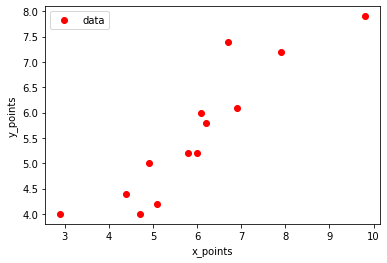

In [3]:
_ = plt.plot(x_points, y_points,'ro',label ='data')
_ = plt.legend()
_ = plt.xlabel('x_points')
_ = plt.ylabel('y_points')
print('\n.............................plotting the data.......................')

# Linear Regression full implementation (full batch gradient descent )

In [4]:
def batch_gradient(x_points,y_points,learning_rate = 0.01, theta0 =0, theta1 =0,iterations = 100):
    m = len(x_points)
    cost_function_list=[]
    theta0_list = []
    theta1_list = []
    it = 0 #variable to compute the number of actual iterations before break
    for i in range(iterations):

        #.........................define y_prediction ,error vectors and ..........................
        y_hat = theta1*x_points + theta0
        error = y_hat - y_points

        #.......................cost_function(loss)..............................
        cost_function = (error.T.dot(error))/(2*m) # J(theta0,theta1)
        
        #.......................appending thetas and cost function..................
        cost_function_list.append(cost_function[0,0])#cuz dot product returns an array if vector .Tdot vector
        theta0_list.append(theta0)
        theta1_list.append(theta1) #appending thetas before updating'em 

        #........................gradient ......................................
        gradient_theta0 = sum(error*1)/m 
        #gradient_theta1 = sum(error*x_points)/m
        gradient_theta1 = error.T.dot(x_points)/m #this returns an array 2d

        #...........................update thetas................................
        theta0 = theta0 - gradient_theta0[0]*learning_rate
        theta1 = theta1 - gradient_theta1[0,0]*learning_rate
        
        #.........................early stop condition.........................
        #u have 3 options 1.compare cost function(<0.001) or 2. compare thetas (norm of theta1 and theta2 vector) or/
        #/ 3. if gradient is really close to zero break and stop(<0.1) big number cuz it will be multiplied by alpha
        it+=1
        if len(cost_function_list) > 1:
            if abs(cost_function_list[-1] - cost_function_list[-2]) <0.0001:
                break
        

    return y_hat, theta0_list , theta1_list , cost_function_list,it

accuracy of the model is 0.7481460845657725


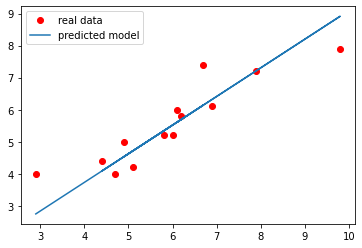

real number of iterations before early stop is 16


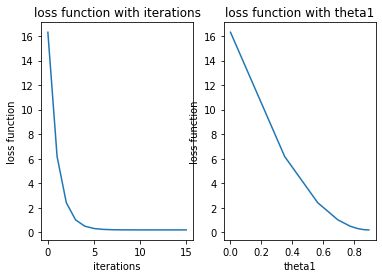

In [5]:
iterations = 100
y_hat , theta0_list , theta1_list , cost_function_list,it = batch_gradient(x_points, y_points,iterations=iterations,learning_rate = 0.01)
_ = plt.plot(x_points,y_points,'ro',label='real data')
_ = plt.plot(x_points,y_hat,label='predicted model')
_ = plt.legend()
print(f'accuracy of the model is {r2_score(y_points,y_hat)}')
plt.show()
print(f'real number of iterations before early stop is {it}')

cost_function_list[0:5]

#.................................ploting the loss function with iterations..........................
fig , axes = plt.subplots(1,2)
#axes[0] = plt.plot(np.arange(0,100),cost_function_list)
_ = plt.title('loss function with iterations')
_ = plt.xlabel('iterations')
_ = plt.ylabel('loss function')

axes[0].plot(np.arange(0,it),cost_function_list)
axes[0].set_title('loss function with iterations')
axes[0].set(xlabel='iterations',ylabel = 'loss function')

axes[1].set_title('loss function with theta1')
axes[1].plot(theta1_list,cost_function_list)
axes[1].set(xlabel='theta1',ylabel = 'loss function')

plt.show()